https://zhuanlan.zhihu.com/p/473403891

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
import autosklearn.regression
import autosklearn.classification

In [3]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("arezaei81/heartcsv")

# print("Path to dataset files:", path)

In [4]:
df=pd.read_csv('/home/wtian/play_ground/ML/datasets/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df['target'].value_counts()
# 两类(0=健康，1=心脏病)
# 这是一个不平衡的数据集。因此，该模型的准确度得分将不太可靠。

target
1    165
0    138
Name: count, dtype: int64

我们将首先通过将不平衡数据集直接馈送到 autosklearn 分类器来测试它。稍后我们将调整这两个类的样本数量并测试准确率，看看分类器的表现如何。

In [6]:
#creating X and y 
X=df.drop(['target'],axis=1)
y=df['target']
#split into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,  # 此任务的最长时间 秒
    per_run_time_limit=30,  # 每个模型评估的时间
    tmp_folder="./tmp",
    memory_limit=10240,  # 设置内存限制为10GB
    n_jobs=30,  # 设置并行任务数量 
)

In [10]:
automl.fit(X_train, y_train)

/home/wtian/miniconda3/envs/py3.8/lib/python3.8/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37235 instead
  warnings.warn(


AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      memory_limit=10240, n_jobs=30, per_run_time_limit=30,
                      time_left_for_this_task=120, tmp_folder='./tmp')

In [11]:
# sprint_statistics()函数总结了上述搜索和选择的最佳模型的性能
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 86f43fb9-03fc-11f0-9018-f40270b90ae7
  Metric: accuracy
  Best validation score: 0.850000
  Number of target algorithm runs: 65
  Number of successful target algorithm runs: 57
  Number of crashed target algorithm runs: 6
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 0



In [12]:
# 搜索考虑的所有模型打印排行榜
print(automl.leaderboard())

          rank  ensemble_weight                type    cost  duration
model_id                                                             
48           1             0.04       random_forest  0.1500  1.681643
25           2             0.20            adaboost  0.1625  2.314760
59           3             0.12       random_forest  0.1750  1.766214
63           4             0.04            adaboost  0.1750  1.108397
49           5             0.30         extra_trees  0.1875  1.617896
41           6             0.02       random_forest  0.2000  1.687776
2            7             0.02       random_forest  0.2125  3.507249
11           8             0.06         extra_trees  0.2375  2.716607
58           9             0.02                 mlp  0.2375  1.373683
10          10             0.02         extra_trees  0.2500  2.339953
51          11             0.02                 lda  0.2500  0.939517
23          12             0.14  passive_aggressive  0.3125  2.076517


In [13]:
# 打印有关所考虑模型的信息
print(automl.show_models())

{2: {'model_id': 2, 'rank': 1, 'cost': 0.21250000000000002, 'ensemble_weight': 0.02, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7a73e0d782b0>, 'balancing': Balancing(random_state=1), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7a73e0cff700>, 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7a73dd7633d0>, 'sklearn_classifier': RandomForestClassifier(max_features=3, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)}, 10: {'model_id': 10, 'rank': 2, 'cost': 0.25, 'ensemble_weight': 0.02, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7a73e0c8a6a0>, 'balancing': Balancing(random_state=1, strategy='weighting'), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object

In [14]:
y_pred = automl.predict(X_test)
print("precision score:", metrics.precision_score(y_test, y_pred))
print("recall score:", metrics.recall_score(y_test, y_pred))
print("f1 score:", metrics.f1_score(y_test, y_pred))
print("auc score:", metrics.roc_auc_score(y_test, y_pred))

precision score: 0.8787878787878788
recall score: 0.90625
f1 score: 0.8923076923076922
auc score: 0.8841594827586207


In [17]:
# 混淆矩阵
conf_matrix= metrics.confusion_matrix(y_pred, y_test)
conf_matrix

array([[25,  3],
       [ 4, 29]])

<Axes: >

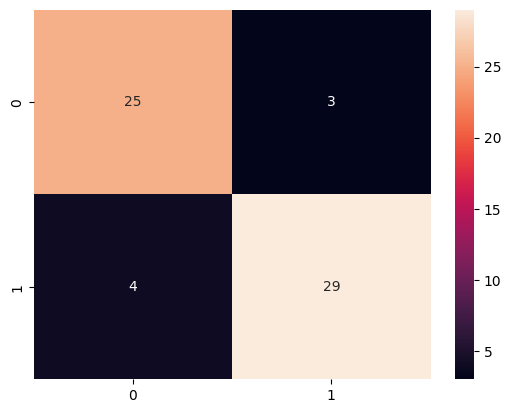

In [18]:
sns.heatmap(conf_matrix, annot=True)